In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Friendzone Clean Dataset.csv')

In [3]:
df = df.drop(df.columns[[0]], axis=1)

In [4]:
df.head()

,city,reason,gender
0,15,1,0
1,13,0,1
2,13,7,0
3,0,7,0
4,15,6,1


<AxesSubplot:ylabel='None'>

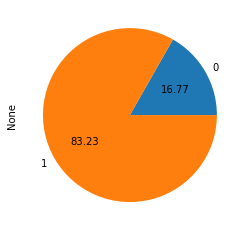

In [5]:
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:>

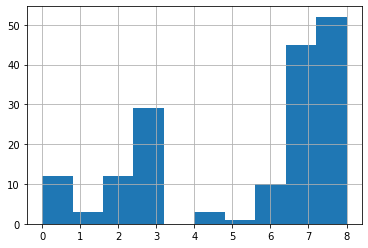

In [6]:
df['reason'].hist()

# K-means Clustering

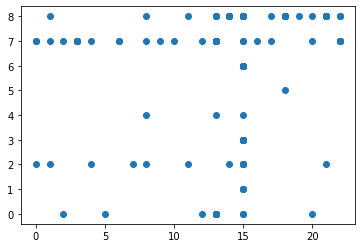

In [7]:
plt.scatter(df['city'],df['reason'])

In [8]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=9)
model.fit(df)
p=[1,2,3]
model.predict([p])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [9]:
centroids=model.cluster_centers_

In [10]:
centroids

array([[12.76923077,  7.15384615,  0.76923077],
       [ 2.4       ,  1.2       ,  0.6       ],
       [15.05      ,  2.7       ,  0.825     ],
       [21.28571429,  7.21428571,  0.78571429],
       [ 2.09090909,  7.09090909,  0.72727273],
       [13.1       ,  0.2       ,  0.9       ],
       [14.90909091,  7.47727273,  0.93181818],
       [ 7.5       ,  5.5       ,  0.75      ],
       [17.88888889,  7.55555556,  0.88888889]])

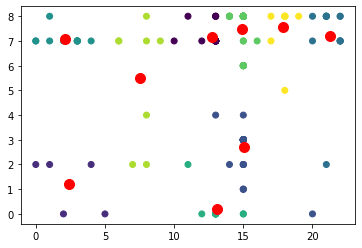

In [11]:
plt.scatter(df[['city']],df['reason'],c=model.labels_)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100)

In [12]:
x=df[['city','reason']]
y=df['gender']

In [13]:
x

,city,reason
0,15,1
1,13,0
2,13,7
3,0,7
4,15,6
...,...,...
162,15,8
163,15,4
164,15,8
165,14,8


In [14]:
y

0      0
1      1
2      0
3      0
4      1
      ..
162    1
163    0
164    0
165    1
166    1
Name: gender, Length: 167, dtype: int64

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='entropy')
#entropy results in higher acc than gini
model=decisiontree.fit(xtrain,ytrain)

In [18]:
ypred=model.predict(xtest)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model accuracy score : 0.7647


In [21]:
df.columns

Index(['city', 'reason', 'gender'], dtype='object')

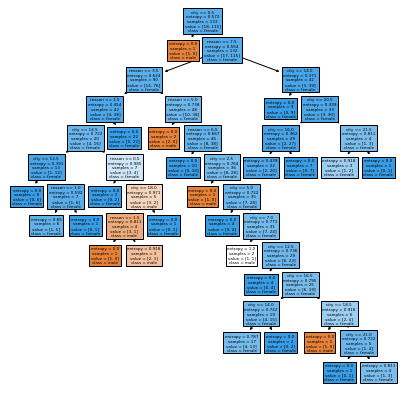

In [22]:
from sklearn import tree
import matplotlib.image as pltimage
fig = plt.figure(figsize=(7,7))
tree.plot_tree(decisiontree, feature_names=['city', 'reason', 'gender'],class_names=['male','female'],filled=True)
fig.savefig('tree.png')

In [23]:
with open('cars tree.txt','w')  as f:
    f.write(rules)

NameError: name 'rules' is not defined

In [ ]:
ytest


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initializing with 'solver' parameter
logmodel = LogisticRegression()
# Training the model
logmodel.fit(xtrain,ytrain)

In [ ]:
predictions = logmodel.predict(xtest)


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(ytest,predictions))
